In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
telco_churn= pd.read_csv("C:\\Users\\Inemesit Ido\\Desktop\\DOCS\\Datanerds\\Telco-Customer-Churn.csv")
telco_churn.head(100)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,Female,0,No,No,12,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,927.35,Yes
96,9803-FTJCG,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Credit card (automatic),66.85,4748.7,No
97,0278-YXOOG,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes
98,3212-KXOCR,Male,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1107.2,No


In [3]:
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Check the data type of the 'TotalCharges' column
print(telco_churn['TotalCharges'].dtype)

# Convert 'TotalCharges' to a numeric data type, using 'coerce' to handle errors
telco_churn['TotalCharges'] = pd.to_numeric(telco_churn['TotalCharges'], errors='coerce')

# Check the data type again to confirm the change
print(telco_churn['TotalCharges'].dtype)


object
float64


In [5]:
# Find rows with non-numeric data (before conversion)
non_numeric_values = telco_churn[telco_churn['TotalCharges'].apply(pd.to_numeric, errors='coerce').isna()]
print(non_numeric_values)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [6]:
empty_strings = telco_churn[telco_churn['TotalCharges'] == '']
print(f"Number of empty strings: {len(empty_strings)}")


Number of empty strings: 0


In [7]:
# Check if there are any null values in the 'TotalCharges' column
null_totalcharges = telco_churn['TotalCharges'].isnull().sum()

# Print the result
print(f"Number of null values in 'TotalCharges': {null_totalcharges}")


Number of null values in 'TotalCharges': 11


In [8]:
from sklearn.impute import SimpleImputer

# An imputer object is created to fill missing values in 'TotalCharges' with the mean (or median)
imputer = SimpleImputer(strategy='mean')  # You can use 'median' if preferred

# Imputing mean to replace the missing values in 'TotalCharges'
telco_churn['TotalCharges'] = imputer.fit_transform(telco_churn[['TotalCharges']])


In [9]:
# Confirming if there are rows where 'TotalCharges' is NaN
rows_with_nan = telco_churn[telco_churn['TotalCharges'].isna()]
print(rows_with_nan)


Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [10]:
gender_count= telco_churn['gender'].value_counts()

#OR

gender_count

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [11]:
gender= telco_churn.groupby('gender').size()
gender

gender
Female    3488
Male      3555
dtype: int64

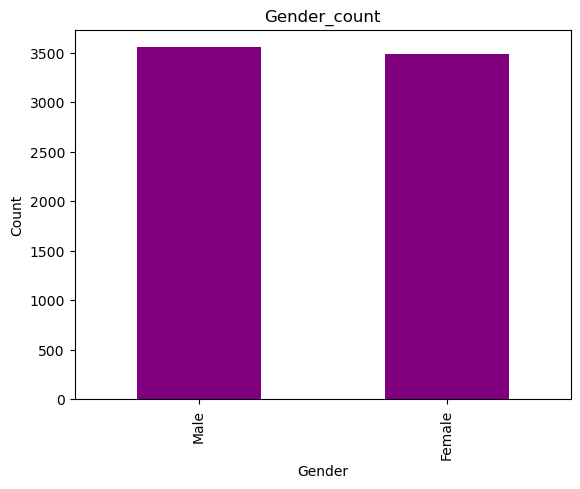

In [12]:
# To know the gender ratio of customers using a bar chart
gender_count.plot(kind= 'bar', title= 'Gender_count', color='purple')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Demographic Impact on Churn:
**Goal**: To investigate how customer characteristics like gender, SeniorCitizen, Partner, and Dependents impact churn.


In [13]:
# Gender based on being senior citizenship
gender_churn= telco_churn.groupby(["Churn", "gender"]).size().unstack()
gender_churn

gender,Female,Male
Churn,,
No,2549,2625
Yes,939,930


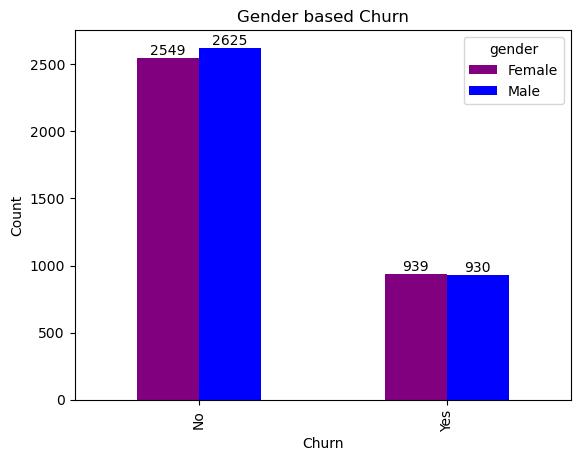

In [14]:
# Plotting gender-based senior citizenship
ax= gender_churn.plot( kind= 'bar', color= ['purple', 'blue'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Gender based Churn')

# Adding count labels on top of each bar
for churn in ax.patches:  # 'ax.patches' contains all the bars in the plot
    ax.text(churn.get_x() + churn.get_width() / 2,    # X-coordinate: center of the bar
            churn.get_height(),                   # Y-coordinate: height of the bar
            str(int(churn.get_height())),         # Text to display (height of the bar as integer)
            ha='center',                      # Center alignment horizontally
            va='bottom',                      # Bottom alignment vertically (text above the bar)
            fontsize=10,                      # Font size of the text
            color='black')                    # Text color

# Show the plot
plt.show()

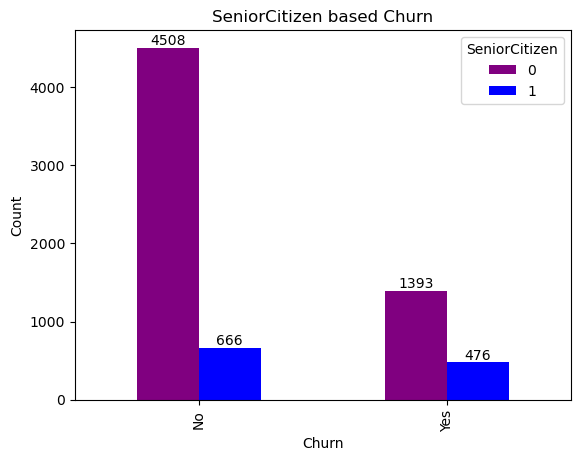

In [15]:
SeniorCitizen_churn= telco_churn.groupby(["Churn", "SeniorCitizen"]).size().unstack()
# Plotting gender-based senior citizenship
ax= SeniorCitizen_churn.plot( kind= 'bar', color= ['purple', 'blue'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('SeniorCitizen based Churn')

# Adding count labels on top of each bar
for churn in ax.patches:  # 'ax.patches' contains all the bars in the plot
    ax.text(churn.get_x() + churn.get_width() / 2,    # X-coordinate: center of the bar
            churn.get_height(),                   # Y-coordinate: height of the bar
            str(int(churn.get_height())),         # Text to display (height of the bar as integer)
            ha='center',                      # Center alignment horizontally
            va='bottom',                      # Bottom alignment vertically (text above the bar)
            fontsize=10,                      # Font size of the text
            color='black')                    # Text color

# Show the plot
plt.show()

In [16]:
Partner_churn= telco_churn.groupby(["Churn", "Partner"]).size().unstack()
Partner_churn

Partner,No,Yes
Churn,,
No,2441,2733
Yes,1200,669


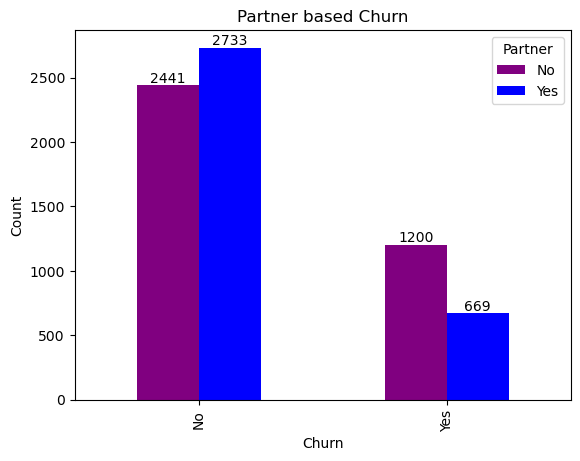

In [17]:
Partner_churn= telco_churn.groupby(["Churn", "Partner"]).size().unstack()
# Plotting gender-based senior citizenship
ax= Partner_churn.plot( kind= 'bar', color= ['purple', 'blue'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Partner based Churn')

# Adding count labels on top of each bar
for churn in ax.patches:  # 'ax.patches' contains all the bars in the plot
    ax.text(churn.get_x() + churn.get_width() / 2,    # X-coordinate: center of the bar
            churn.get_height(),                   # Y-coordinate: height of the bar
            str(int(churn.get_height())),         # Text to display (height of the bar as integer)
            ha='center',                      # Center alignment horizontally
            va='bottom',                      # Bottom alignment vertically (text above the bar)
            fontsize=10,                      # Font size of the text
            color='black')                    # Text color

# Show the plot
plt.show()

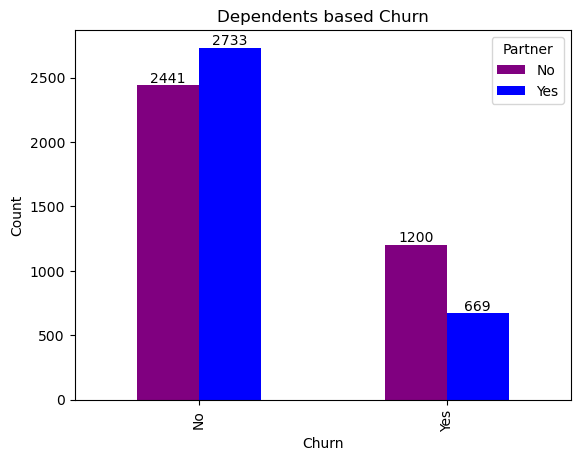

In [18]:
dependents_churn= telco_churn.groupby(["Churn", "Dependents"]).size().unstack()
# Plotting gender-based senior citizenship
ax= Partner_churn.plot( kind= 'bar', color= ['purple', 'blue'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Dependents based Churn')

# Adding count labels on top of each bar
for churn in ax.patches:  # 'ax.patches' contains all the bars in the plot
    ax.text(churn.get_x() + churn.get_width() / 2,    # X-coordinate: center of the bar
            churn.get_height(),                   # Y-coordinate: height of the bar
            str(int(churn.get_height())),         # Text to display (height of the bar as integer)
            ha='center',                      # Center alignment horizontally
            va='bottom',                      # Bottom alignment vertically (text above the bar)
            fontsize=10,                      # Font size of the text
            color='black')                    # Text color

# Show the plot
plt.show()

**Goal:**
To calculate the overall churn rate, which shows the percentage of customers who stopped using the service. This is computed by dividing the number of churned customers (where Churn = Yes) by the total number of customers.

In [19]:
'''Calculating churn percentage for genders'''

# number of churned customers
overall_churn= telco_churn[telco_churn["Churn"]== 'Yes'].shape[0]
# Number of female and male customers who churned
female_churn = telco_churn[(telco_churn["gender"] == 'Female') & (telco_churn["Churn"] == 'Yes')].shape[0]
male_churn = telco_churn[(telco_churn["gender"] == 'Male') & (telco_churn["Churn"] == 'Yes')].shape[0]

# Total number of female and male customers
total_females = telco_churn[telco_churn["gender"] == 'Female'].shape[0]
total_males = telco_churn[telco_churn["gender"] == 'Male'].shape[0]
#Total number of customers
total_customers= telco_churn["gender"].count()

#Churn rate
overall_churn_rate= (overall_churn / total_customers) * 100
female_churn_rate= (female_churn / total_females) * 100
male_churn_rate= (male_churn / total_males) * 100

# Non churn rate 

#Printing out the churn rate
print(f"The Overall churn rate is: {overall_churn_rate:.2f}%")
print(f"The female churn rate is: {female_churn_rate:.2f}%")
print(f"The male churn rate is: {male_churn_rate:.2f}%")

The Overall churn rate is: 26.54%
The female churn rate is: 26.92%
The male churn rate is: 26.16%


In [20]:
''' Calculating churn percentage for Senior citizen'''

# number of churned customers
overall_churn= telco_churn[telco_churn["Churn"]== 'Yes'].shape[0]
# Number of senior and non senior citizens who churned
senior_churn = telco_churn[(telco_churn["SeniorCitizen"] == 1) & (telco_churn["Churn"] == 'Yes')].shape[0]
no_senior_churn = telco_churn[(telco_churn["SeniorCitizen"] == 0) & (telco_churn["Churn"] == 'Yes')].shape[0]


#Total number of customers
total_customers= telco_churn["SeniorCitizen"].count()
# total senior and non-senior citizens
total_senior_citizens = telco_churn[telco_churn["SeniorCitizen"] == 1].shape[0]
total_non_senior_citizens = telco_churn[telco_churn["SeniorCitizen"] == 0].shape[0]


#Churn rate
overall_churn_rate= (overall_churn / total_customers) * 100
senior_churn_rate= (senior_churn / total_senior_citizens) * 100
non_senior_churn_rate= (no_senior_churn / total_non_senior_citizens) * 100

# Non churn rate 

#Printing out the churn rate
print(f"The Overall churn rate is: {overall_churn_rate:.2f}%")
print(f"The Senior citizen churn rate is: {senior_churn_rate:.2f}%")
print(f"The Non-Senior citizen churn rate is: {non_senior_churn_rate:.2f}%")

The Overall churn rate is: 26.54%
The Senior citizen churn rate is: 41.68%
The Non-Senior citizen churn rate is: 23.61%


In [21]:
'''Calculating churn percentage for dependents'''

# number of churned customers
overall_churn= telco_churn[telco_churn["Churn"]== 'Yes'].shape[0]
# Number of female and male customers who churned
dependents_churn = telco_churn[(telco_churn["Dependents"] == 'Yes') & (telco_churn["Churn"] == 'Yes')].shape[0]
non_dependents_churn = telco_churn[(telco_churn["Dependents"] == 'No') & (telco_churn["Churn"] == 'Yes')].shape[0]

# Total number of female and male customers
total_dependents = telco_churn[telco_churn["Dependents"] == 'Yes'].shape[0]
total_non_dependents = telco_churn[telco_churn["Dependents"] == 'No'].shape[0]
#Total number of customers
total_customers= telco_churn["Dependents"].count()
print(overall_churn)
#Churn rate
overall_churn_rate= (overall_churn / total_customers) * 100
dependents_churn_rate= (dependents_churn / total_dependents) * 100
non_dependents_churn_rate= (non_dependents_churn / total_non_dependents) * 100 

#Printing out the churn rate
print(f"The Overall churn rate is: {overall_churn_rate:.2f}%")
print(f"The dependents churn rate is: {dependents_churn_rate:.2f}%")
print(f"The non_dependents churn rate is: {non_dependents_churn_rate:.2f}%")

1869
The Overall churn rate is: 26.54%
The dependents churn rate is: 15.45%
The non_dependents churn rate is: 31.28%


In [22]:
'''Calculating churn percentage partners'''

# number of churned customers
overall_churn= telco_churn[telco_churn["Churn"]== 'Yes'].shape[0]
# Number of female and male customers who churned
partner_churn = telco_churn[(telco_churn["Partner"] == 'Yes') & (telco_churn["Churn"] == 'Yes')].shape[0]
non_partner_churn = telco_churn[(telco_churn["Partner"] == 'No') & (telco_churn["Churn"] == 'Yes')].shape[0]

# Total number of female and male customers
total_partners = telco_churn[telco_churn["Partner"] == 'Yes'].shape[0]
total_non_partners = telco_churn[telco_churn["Partner"] == 'No'].shape[0]
#Total number of customers
total_customers= telco_churn["Partner"].count()

#Churn rate
overall_churn_rate= (overall_churn / total_customers) * 100
partners_churn_rate= (partner_churn / total_partners) * 100
non_partners_churn_rate= (non_partner_churn / total_non_partners) * 100 

#Printing out the churn rate
print(f"The Overall churn rate is: {overall_churn_rate:.2f}%")
print(f"The partner churn rate is: {partners_churn_rate:.2f}%")
print(f"The non_partners churn rate is: {non_partners_churn_rate:.2f}%")

The Overall churn rate is: 26.54%
The partner churn rate is: 19.66%
The non_partners churn rate is: 32.96%


# Customer Segmentation

## Tenure-Based Segmentation:

**Goal:**
Group customers based on how long they've been with the company (tenure), and analyze their service usage, churn rates, and payment behavior.

**Note:** Creating groups like 0-12 months, 12-24 months, and more than 24 months, to observe how churn changes. 

In [23]:
telco_churn2= telco_churn.copy()
telco_churn2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


C:\Users\Inemesit Ido\AppData\Local\Temp\ipykernel_14816\3754087890.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn_group = telco_churn2.groupby(['TenureGroup', 'Churn']).size().unstack()


<Figure size 800x600 with 0 Axes>

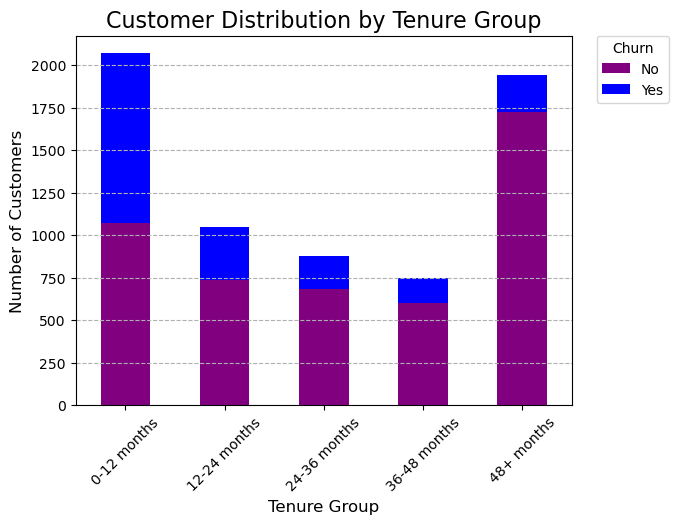

In [24]:
import pandas as pd

# Define tenure groups
bins = [0, 12, 24, 36, 48, telco_churn2['tenure'].max()]  # max() will get the largest tenure value
labels = ['0-12 months', '12-24 months', '24-36 months', '36-48 months', '48+ months']

# Create a new column for tenure groups
telco_churn2['TenureGroup'] = pd.cut(telco_churn2['tenure'], bins=bins, labels=labels, right=False)

# Group by tenure group and churn status (Yes/No)
tenure_churn_group = telco_churn2.groupby(['TenureGroup', 'Churn']).size().unstack()

# Plot stacked bar chart
plt.figure(figsize=(8, 6))
tenure_churn_group.plot(kind='bar', stacked=True, color=['purple', 'blue'])

# Add labels and title
plt.title('Customer Distribution by Tenure Group', fontsize=16)
plt.xlabel('Tenure Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

# Add a legend for Churn (Yes/No)
# Adjust legend position to avoid overlapping with the plot
plt.legend(title='Churn', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)

# Show the plot
#plt.tight_layout()
plt.show()

In [25]:
tenure_churn = telco_churn2.groupby('TenureGroup')['Churn'].value_counts().unstack(fill_value=0)
tenure_churn

C:\Users\Inemesit Ido\AppData\Local\Temp\ipykernel_14816\2466536233.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = telco_churn2.groupby('TenureGroup')['Churn'].value_counts().unstack(fill_value=0)


Churn,No,Yes
TenureGroup,,
0-12 months,1070,999
12-24 months,738,309
24-36 months,683,193
36-48 months,602,146
48+ months,1725,216


In [26]:
# churn rates by tenure group
churn_rate_by_tenure = telco_churn2.groupby('TenureGroup')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(churn_rate_by_tenure)

TenureGroup
0-12 months     48.284195
12-24 months    29.512894
24-36 months    22.031963
36-48 months    19.518717
48+ months      11.128284
Name: Churn, dtype: float64


C:\Users\Inemesit Ido\AppData\Local\Temp\ipykernel_14816\2653074709.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_tenure = telco_churn2.groupby('TenureGroup')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)


C:\Users\Inemesit Ido\AppData\Local\Temp\ipykernel_14816\3121017483.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_counts = telco_churn2.groupby('TenureGroup')['Churn'].value_counts().unstack(fill_value=0)


TenureGroup
0-12 months     48.28%
12-24 months    29.51%
24-36 months    22.03%
36-48 months    19.52%
48+ months      11.13%
dtype: object


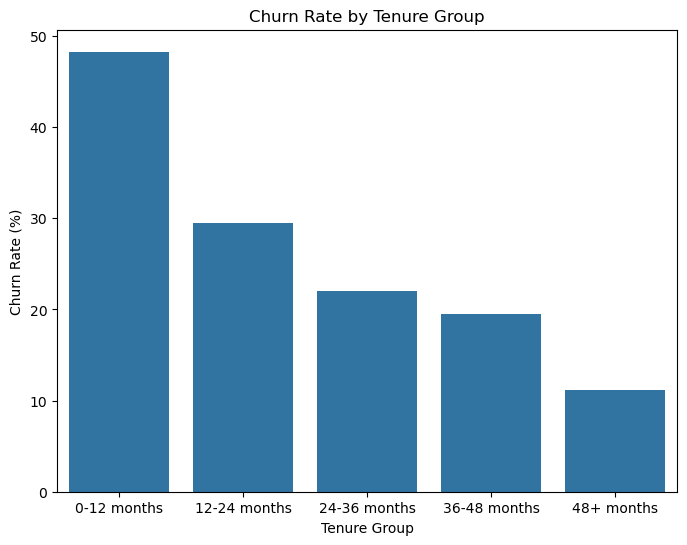

In [27]:
# Group by TenureGroup and aggregate churn counts
churn_counts = telco_churn2.groupby('TenureGroup')['Churn'].value_counts().unstack(fill_value=0)

# churn rate as a percentage
churn_rate_by_tenure = (churn_counts['Yes'] / (churn_counts['Yes'] + churn_counts['No'])) * 100

# Formating the churn rate with a percentage sign
churn_rate_by_tenure_percent = churn_rate_by_tenure.apply(lambda x: f"{x:.2f}%")

# Print the churn rate by tenure group with percentage signs
print(churn_rate_by_tenure_percent)

# Plot churn rate by tenure group
plt.figure(figsize=(8,6))
sns.barplot(x=churn_rate_by_tenure.index, y=churn_rate_by_tenure.values)
plt.title('Churn Rate by Tenure Group')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Tenure Group')
plt.show()

In [28]:
# service usage by tenure group (example: InternetService)
service_usage_by_tenure = telco_churn2.groupby('TenureGroup')['InternetService'].value_counts(normalize=True)

# Print the service usage by tenure group
print(service_usage_by_tenure)

TenureGroup   InternetService
0-12 months   Fiber optic        0.425326
              DSL                0.342678
              No                 0.231996
12-24 months  Fiber optic        0.435530
              DSL                0.325692
              No                 0.238777
24-36 months  Fiber optic        0.453196
              DSL                0.339041
              No                 0.207763
36-48 months  Fiber optic        0.435829
              DSL                0.348930
              No                 0.215241
48+ months    Fiber optic        0.450283
              DSL                0.350335
              No                 0.199382
Name: proportion, dtype: float64


C:\Users\Inemesit Ido\AppData\Local\Temp\ipykernel_14816\322640321.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  service_usage_by_tenure = telco_churn2.groupby('TenureGroup')['InternetService'].value_counts(normalize=True)


In [29]:
#Analysing the monthly charges in comparison to how it affects churn rate
# average monthly charges by tenure group
avg_monthly_charges = telco_churn2.groupby('TenureGroup')['MonthlyCharges'].mean()
print(avg_monthly_charges)

# total charges by tenure group
avg_total_charges = telco_churn2.groupby('TenureGroup')['TotalCharges'].mean()
print(avg_total_charges)


TenureGroup
0-12 months     56.056017
12-24 months    60.853295
24-36 months    65.127854
36-48 months    66.430615
48+ months      72.369552
Name: MonthlyCharges, dtype: float64
TenureGroup
0-12 months      264.940481
12-24 months    1044.282378
24-36 months    1913.745377
36-48 months    2774.244519
48+ months      4422.503117
Name: TotalCharges, dtype: float64


C:\Users\Inemesit Ido\AppData\Local\Temp\ipykernel_14816\3387027051.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_monthly_charges = telco_churn2.groupby('TenureGroup')['MonthlyCharges'].mean()
C:\Users\Inemesit Ido\AppData\Local\Temp\ipykernel_14816\3387027051.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_total_charges = telco_churn2.groupby('TenureGroup')['TotalCharges'].mean()


## Contract-Based Segmentation:

**Goal:**
To segment customers based on the Contract column (e.g., month-to-month, one-year, two-year contracts) and see how their behavior differs.

In [30]:
telco_churn2['Contract']. value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [31]:
# Convert churn to binary
telco_churn2['Churn_Binary'] = telco_churn2['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate churn rate by contract type
churn_rate_by_contract = telco_churn2.groupby('Contract')['Churn_Binary'].mean() * 100

# Print churn rate by contract type
print(churn_rate_by_contract)

Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn_Binary, dtype: float64


In [32]:
# A column created to indicate if a customer has churned
telco_churn2['Churn_Binary'] = telco_churn['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Group by contract type
churn_by_contract = telco_churn2.groupby('Contract').agg(
    Total_Customers=('Churn_Binary', 'count'),         # Count total customers per contract type
    Churned_Customers=('Churn_Binary', 'sum')          # Count churned customers per contract type
)

# Churn rate as a percentage
churn_by_contract['Churn_Rate'] = (churn_by_contract['Churned_Customers'] / churn_by_contract['Total_Customers']) * 100

# Index reset for better readability
churn_by_contract.reset_index(inplace=True)

# Print the results
print(churn_by_contract[['Contract', 'Total_Customers', 'Churned_Customers', 'Churn_Rate']])


         Contract  Total_Customers  Churned_Customers  Churn_Rate
0  Month-to-month             3875               1655   42.709677
1        One year             1473                166   11.269518
2        Two year             1695                 48    2.831858


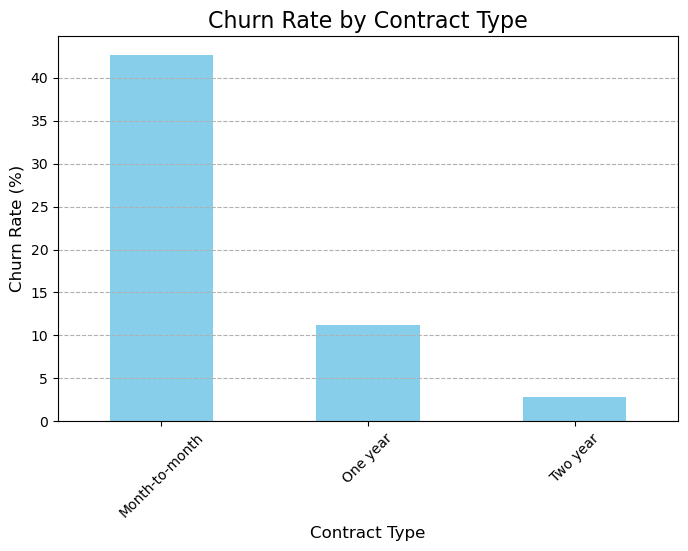

In [33]:
# Plot churn rates by contract type
plt.figure(figsize=(8, 5))
churn_rate_by_contract.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Contract Type', fontsize=16)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


In [34]:
telco_churn2.info()
print(telco_churn2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

 # Service Usage Analysis

Services provided by:
MultipleLines
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: proportion, dtype: float64




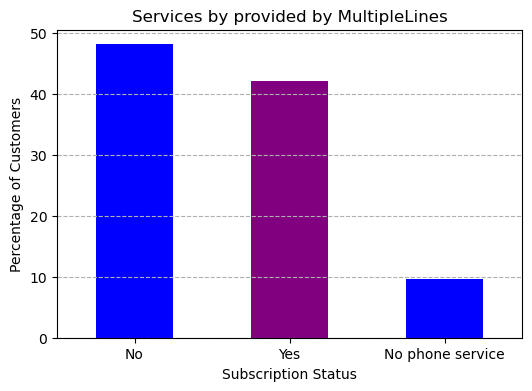

Services provided by:
InternetService
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: proportion, dtype: float64




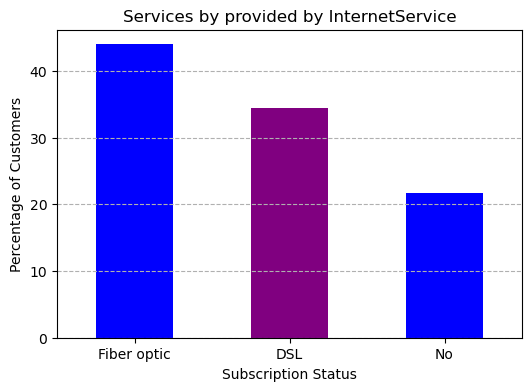

Services provided by:
OnlineSecurity
No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: proportion, dtype: float64




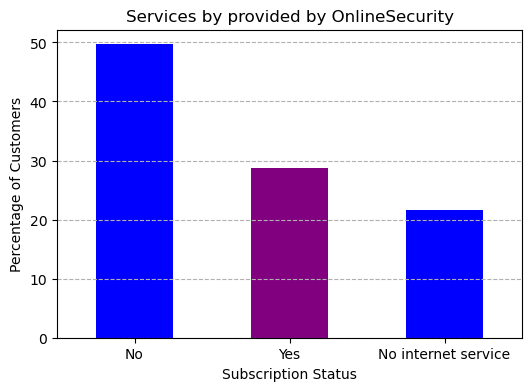

Services provided by:
OnlineBackup
No                     43.844952
Yes                    34.488144
No internet service    21.666903
Name: proportion, dtype: float64




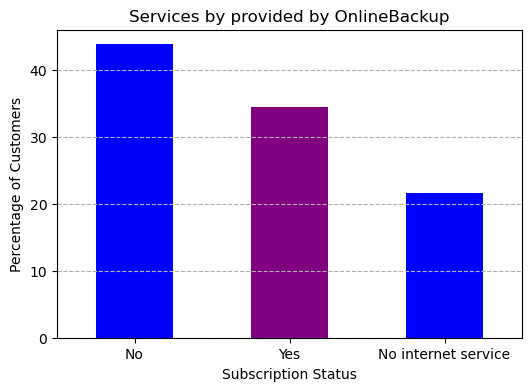

Services provided by:
DeviceProtection
No                     43.944342
Yes                    34.388755
No internet service    21.666903
Name: proportion, dtype: float64




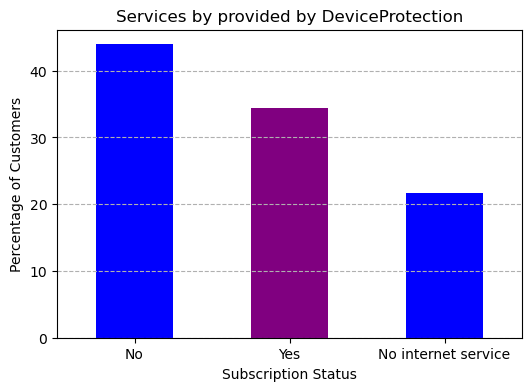

Services provided by:
TechSupport
No                     49.311373
Yes                    29.021724
No internet service    21.666903
Name: proportion, dtype: float64




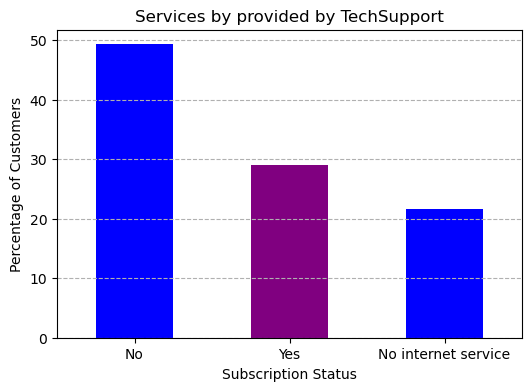

Services provided by:
StreamingTV
No                     39.897771
Yes                    38.435326
No internet service    21.666903
Name: proportion, dtype: float64




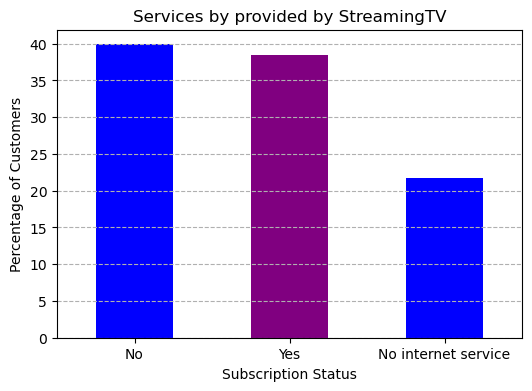

Services provided by:
StreamingMovies
No                     39.542808
Yes                    38.790288
No internet service    21.666903
Name: proportion, dtype: float64




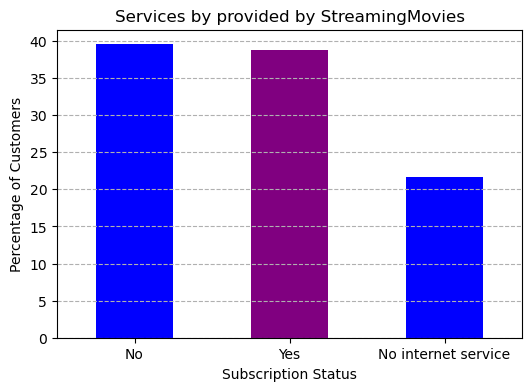

In [35]:
# List of all services provided
services= ['MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV','StreamingMovies']

for service in services:
    plt.figure(figsize=(6, 4))
    subscriptions= telco_churn[service].value_counts(normalize= True) * 100
    print(f'Services provided by:')
    print(subscriptions)
    print('\n')

    subscriptions.plot(kind= 'bar', color= ['blue', 'purple'])
    plt.title(f'Services by provided by {service}')
    plt.xlabel('Subscription Status')
    plt.ylabel('Percentage of Customers')
    plt.xticks(rotation= 0)
    plt.grid(axis= 'y', linestyle= '--')
    plt.show()
    

## Bundling Services:
Goal: Analyze which customers subscribe to multiple services and how that affects churn.
Example: You can create a combination of services and analyze if customers who have both phone and internet services churn less than those with only one service.

In [36]:
# Example: Internet + Streaming (TV + Movies) bundle
bundle_filter = (telco_churn['InternetService'] != 'No') & (telco_churn['StreamingTV'] == 'Yes') & (telco_churn['StreamingMovies'] == 'Yes')

# Calculate churn rate for this specific bundle
bundle_churn_rate = telco_churn[bundle_filter]['Churn'].eq('Yes').mean() * 100
print(f"Churn Rate for Internet + StreamingTV + StreamingMovies Bundle: {bundle_churn_rate:.2f}%")


Churn Rate for Internet + StreamingTV + StreamingMovies Bundle: 29.43%


# Payment Analysis
## Revenue Distribution

The average monthly charges is 64.76169246059918


<Axes: title={'center': 'Distribution of monthly charges'}, xlabel='average monthly charges', ylabel='Frequency'>

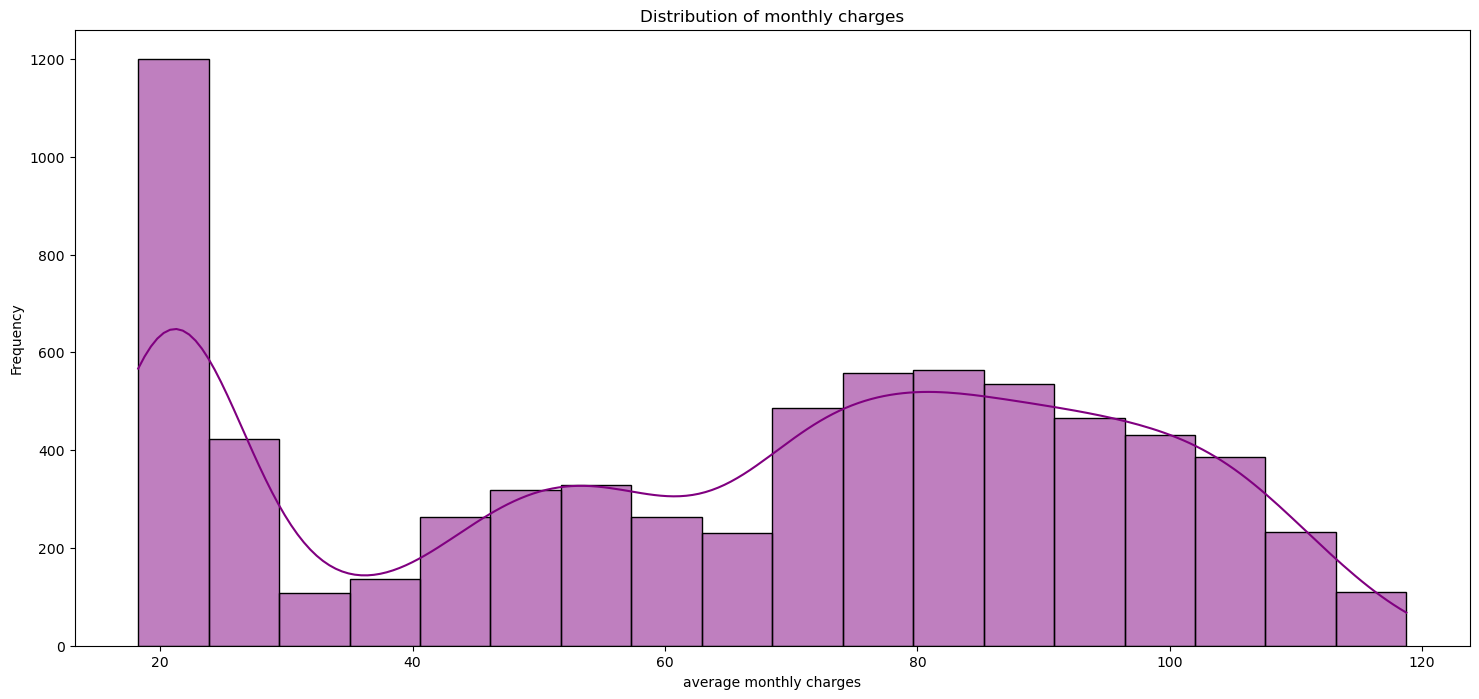

In [37]:
#Calculating average charges per customer
ave_monthly_charges= telco_churn['MonthlyCharges'].mean()
print(f"The average monthly charges is {ave_monthly_charges}")

# Visualisation of the Distribution of monthly charges
plt.figure(figsize=(18,8))
plt.xlabel("average monthly charges")
plt.ylabel("Frequency")
plt.title("Distribution of monthly charges")
sns.histplot(x= telco_churn['MonthlyCharges'], kde= True, color= "purple")


The average total charges is 2283.3004408418656


<Axes: title={'center': 'Distribution of Total charges'}, xlabel='average total charges', ylabel='Frequency'>

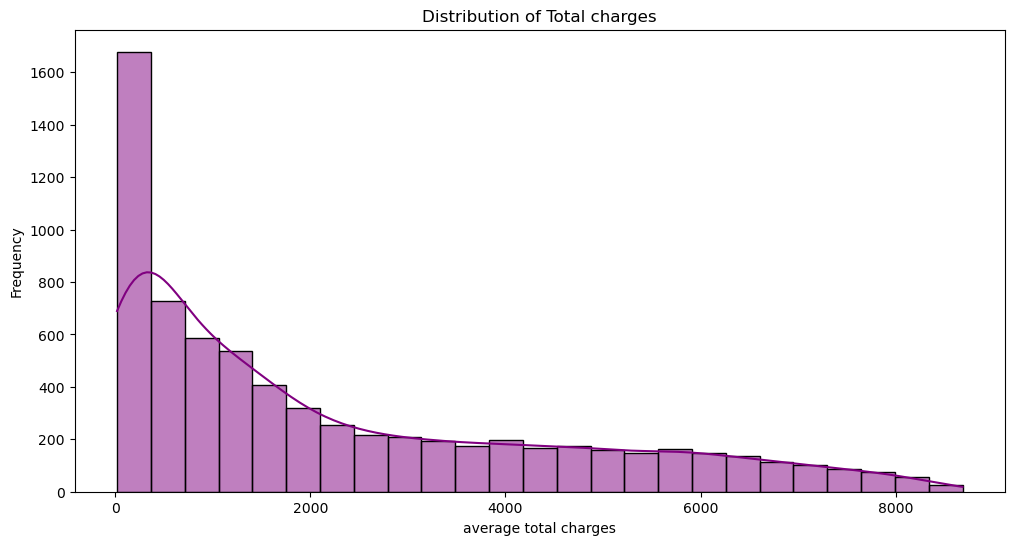

In [38]:
#Calculating average charges per customer
ave_total_charges= telco_churn['TotalCharges'].mean()
print(f"The average total charges is {ave_total_charges}")

# Visualisation of the Distribution of monthly charges
plt.figure(figsize= (12,6))
plt.xlabel("average total charges")
plt.ylabel("Frequency")
plt.title("Distribution of Total charges")
sns.histplot(x= telco_churn['TotalCharges'], kde= True, color= "purple")


# Churn rates based on Payment methods

In [39]:
# Group by PaymentMethod and Churn, then count the occurrences
payment_method_grouped = telco_churn.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0)

# Columns
payment_method_grouped.columns = ['Not Churned', 'Churned']

# Add a Total column (sum of churned and non-churned customers)
payment_method_grouped['Total'] = payment_method_grouped['Not Churned'] + payment_method_grouped['Churned']

payment_method_grouped['Churn rate']= (payment_method_grouped['Churned'] / payment_method_grouped ['Total']) * 100

# Display the result
print(payment_method_grouped)

                           Not Churned  Churned  Total  Churn rate
PaymentMethod                                                     
Bank transfer (automatic)         1286      258   1544   16.709845
Credit card (automatic)           1290      232   1522   15.243101
Electronic check                  1294     1071   2365   45.285412
Mailed check                      1304      308   1612   19.106700


In [40]:
telco_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Correlation analysis 

In [42]:
correlation_matrix = telco_churn[['tenure', 'MonthlyCharges', 'TotalCharges','SeniorCitizen']].corr()

# Display the correlation matrix
print(correlation_matrix)

                  tenure  MonthlyCharges  TotalCharges  SeniorCitizen
tenure          1.000000        0.247900      0.824757       0.016567
MonthlyCharges  0.247900        1.000000      0.650468       0.220173
TotalCharges    0.824757        0.650468      1.000000       0.102395
SeniorCitizen   0.016567        0.220173      0.102395       1.000000


In [43]:
# Correlation between churn and numerical features
churn_corr = telco_churn2[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_Binary', 'SeniorCitizen']].corr()

# Display the correlation matrix for churn
print(churn_corr['Churn_Binary'])


tenure           -0.352229
MonthlyCharges    0.193356
TotalCharges     -0.199428
Churn_Binary      1.000000
SeniorCitizen     0.150889
Name: Churn_Binary, dtype: float64


# Customer Lifetime Value Estimation (CLV)

In [44]:
average_monthly_charges= telco_churn.groupby("PaymentMethod")["MonthlyCharges"].mean()
average_monthly_charges_dict= average_monthly_charges.to_dict()
for method, pay in average_monthly_charges_dict.items():
    print(f'The average monthly charge for {method} is {pay:.2f}')

The average monthly charge for Bank transfer (automatic) is 67.19
The average monthly charge for Credit card (automatic) is 66.51
The average monthly charge for Electronic check is 76.26
The average monthly charge for Mailed check is 43.92


In [45]:
#  calculation of CLV
def calculate_clv(monthly_charges, churn_rate):
    avg_lifetime = 1 / churn_rate
    clv = monthly_charges * avg_lifetime
    return clv

# churn rates for different customer groups
churn_rates = (payment_method_grouped['Churned'] / payment_method_grouped ['Total']) 

# average monthly charges for each payment method
average_monthly_charges = telco_churn.groupby("PaymentMethod")["MonthlyCharges"].mean()

# Calculation of  CLV for each group
for payment_method, churn_rate in churn_rates.items():
    clv = calculate_clv(average_monthly_charges[payment_method], churn_rate)
    print(f'CLV for {payment_method}: ${clv:.2f}')


CLV for Bank transfer (automatic): $402.11
CLV for Credit card (automatic): $436.34
CLV for Electronic check: $168.39
CLV for Mailed check: $229.85


# Predictive anlaysis

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [47]:
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [48]:
# CHECKING FOR MULTICLASS COLUMNS AND BINARY COLUMNS
group_columns= ['OnlineSecurity', 'StreamingMovies', 'DeviceProtection', 'InternetService',	
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'OnlineBackup', 
                'Contract', 'PaymentMethod', 'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
# Get the unique group keys
for column in group_columns:
    print(f"Grouping by {column}:")
    groupings= telco_churn.groupby(column)
    # Iterate through each group and print group name and data
    for name, data in groupings :
        print(f"Group: {name}")
        #print(data.head())  # Print the first few rows of each group
    print('\n')

Grouping by OnlineSecurity:
Group: No
Group: No internet service
Group: Yes


Grouping by StreamingMovies:
Group: No
Group: No internet service
Group: Yes


Grouping by DeviceProtection:
Group: No
Group: No internet service
Group: Yes


Grouping by InternetService:
Group: DSL
Group: Fiber optic
Group: No


Grouping by TechSupport:
Group: No
Group: No internet service
Group: Yes


Grouping by StreamingTV:
Group: No
Group: No internet service
Group: Yes


Grouping by StreamingMovies:
Group: No
Group: No internet service
Group: Yes


Grouping by MultipleLines:
Group: No
Group: No phone service
Group: Yes


Grouping by OnlineBackup:
Group: No
Group: No internet service
Group: Yes


Grouping by Contract:
Group: Month-to-month
Group: One year
Group: Two year


Grouping by PaymentMethod:
Group: Bank transfer (automatic)
Group: Credit card (automatic)
Group: Electronic check
Group: Mailed check


Grouping by gender:
Group: Female
Group: Male


Grouping by Partner:
Group: No
Group: Yes


Groupi

In [49]:
# Coverting target categorical variable to numerical value
telco_churn['Churn'] = telco_churn['Churn'].map({'Yes': 1, 'No': 0})

In [50]:
#Applying label encoding to binary classes 
label_encoder= LabelEncoder()
binary_columns= ['gender', 'Partner','Dependents', 'PhoneService', 'PaperlessBilling']

for columns in binary_columns:
    telco_churn[columns]= label_encoder.fit_transform(telco_churn[columns])

In [51]:
# Applying one-hot encoding to multiple columns with multiclasses
multiclass_encoding = pd.get_dummies(telco_churn, columns=['InternetService', 'OnlineSecurity', 
                                                          'StreamingMovies', 'DeviceProtection', 
                                                          'TechSupport', 'StreamingTV', 'MultipleLines', 
                                                          'OnlineBackup', 'Contract', 'PaymentMethod'], )
                                     #drop_first=True)



# Check the new columns after encoding
print(multiclass_encoding.head())

# Check the columns and types again
print(multiclass_encoding.dtypes)

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
0             0                 1           29.85         29.85  ...   
1             1                 0           56.95       1889.50  ...   
2             1                 1           53.85        108.15  ...   
3             0                 0           42.30       1840.75  ...   
4             1                 1           70.70        151.65  ...   

   OnlineBackup_No  OnlineBackup_No internet service  OnlineBackup_Yes  \
0            False                             False              True   
1   

In [52]:
# Converting boolean columns to integers
bool_columns = multiclass_encoding.select_dtypes(include=['bool']).columns
multiclass_encoding[bool_columns] = multiclass_encoding[bool_columns].astype(int)

# Checking the updated data types
print(multiclass_encoding.dtypes)


customerID                                  object
gender                                       int32
SeniorCitizen                                int64
Partner                                      int32
Dependents                                   int32
tenure                                       int64
PhoneService                                 int32
PaperlessBilling                             int32
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No                           int32
OnlineSecurity_No                            int32
OnlineSecurity_No internet service           int32
OnlineSecurity_Yes                           int32
StreamingMovies_No                           int32
StreamingMovies_No internet service          int32
StreamingMovies_Yes            

In [53]:
#Dropping column that does not provide meaningful information 
multiclass_encoding.drop('customerID', axis= 1, inplace= True)

In [54]:
# Separating into target and independent variables
X= multiclass_encoding.drop('Churn', axis= 1)
y= multiclass_encoding['Churn']

#Splitting the data
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

In [55]:
scaler= StandardScaler()
scaled_columns= scaler.fit_transform(multiclass_encoding[['TotalCharges', 'MonthlyCharges', 'tenure' ]])


# Model Selection

In [56]:
# Confirming the datatypes of the X_train
print(X_train.dtypes)


gender                                       int32
SeniorCitizen                                int64
Partner                                      int32
Dependents                                   int32
tenure                                       int64
PhoneService                                 int32
PaperlessBilling                             int32
MonthlyCharges                             float64
TotalCharges                               float64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No                           int32
OnlineSecurity_No                            int32
OnlineSecurity_No internet service           int32
OnlineSecurity_Yes                           int32
StreamingMovies_No                           int32
StreamingMovies_No internet service          int32
StreamingMovies_Yes                          int32
DeviceProtection_No                          int32
DeviceProtection_No internet se

In [57]:
# Using Logistic regression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
logistic_model= LogisticRegression()
logistic_model.fit(X_train, y_train)

y_log_reg_pred= logistic_model.predict(X_test)

accuracy= accuracy_score(y_test, y_log_reg_pred)
print(f'The accuracy score of the Logistic regression is {accuracy:.2f}')
print(classification_report(y_test, y_log_reg_pred))

The accuracy score of the Logistic regression is 0.82
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.61      0.65       373

    accuracy                           0.82      1409
   macro avg       0.78      0.76      0.76      1409
weighted avg       0.82      0.82      0.82      1409



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
# using Random forest model
from sklearn.ensemble import RandomForestClassifier

forest_model= RandomForestClassifier(n_estimators= 100, random_state= 42)
forest_model.fit(X_train, y_train)

y_rf_pred= forest_model.predict(X_test)

# Evaluate the model
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_rf_pred):.2f}')
print(classification_report(y_test, y_rf_pred))



Random Forest Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



In [59]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=1.0, random_state=42)  
# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_svc_pred = svm_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_svc_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_svc_pred))

Accuracy: 0.7934705464868701

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.66      0.45      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [60]:
# Confirming that there is no null values in each column of the dataset
multiclass_encoding.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
StreamingMovies_No                         0
StreamingMovies_No internet service        0
StreamingMovies_Yes                        0
DeviceProtection_No                        0
DeviceProtection_No internet service       0
DeviceProtection_Yes                       0
TechSuppor

In [61]:
multiclass_encoding

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,1,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,1,0,0,1,0,0,0,0,0,1


In [62]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [63]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



# Improving performance of model

In [64]:
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [65]:
# Applying Random Oversampling using random forest classifier
oversample = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversample.fit_resample(X_train, y_train)
print(f'Class distribution after oversampling: {np.bincount(y_resampled)}')

# Training a model on resampled data
model = RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=100, random_state=42)
model.fit(X_resampled, y_resampled)

# Predictions
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


Class distribution after oversampling: [4138 4138]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1036
           1       0.59      0.70      0.64       373

    accuracy                           0.79      1409
   macro avg       0.74      0.76      0.75      1409
weighted avg       0.81      0.79      0.80      1409



In [66]:
# Applying Random Undersampling using random forest classifier
undersample = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)
print(f'Class distribution after undersampling: {np.bincount(y_resampled)}')

# Training a model on resampled data
model = RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=100, random_state=42)
model.fit(X_resampled, y_resampled)

# Predictions
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


Class distribution after undersampling: [1496 1496]
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1036
           1       0.54      0.82      0.65       373

    accuracy                           0.76      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.76      0.78      1409



In [67]:
# Applying SMOTE for synthetic data generation using random forest classifier
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print(f'Class distribution after SMOTE: {np.bincount(y_resampled)}')

# Training a model on resampled data
model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)

# Predictions
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


Class distribution after SMOTE: [4138 4138]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1036
           1       0.61      0.55      0.58       373

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



In [76]:
# Applying Random Oversampling using logistic regression 
lr_oversample= RandomOverSampler(sampling_strategy='minority',random_state=42)
X_oversampled, y_oversampled= lr_oversample.fit_resample(X_train, y_train)
print(f'Class distribution after oversampling:{np.bincount(y_oversampled)}')

# training the model using logistic regression
over_lr_model= LogisticRegression(random_state=42)
over_lr_model.fit(X_oversampled, y_oversampled)

# predictions
over_y_pred= over_lr_model.predict(X_test)
print(classification_report(y_test, over_y_pred))

Class distribution after oversampling:[4138 4138]
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1036
           1       0.52      0.82      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.75      0.77      1409



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
# Applying Random Undersampling using logistic regression
lr_undersample = RandomUnderSampler(sampling_strategy= 'majority',random_state=42)
X_undersampled, y_undersampled = lr_undersample.fit_resample(X_train, y_train)
print(f'Class distribution after undersampling: {np.bincount(y_undersampled)}')

# Training a model on resampled data
under_lr_model = LogisticRegression(random_state=42)
under_lr_model.fit(X_undersampled, y_undersampled)

# Predictions
under_y_pred = under_lr_model.predict(X_test)
print(classification_report(y_test, under_y_pred))

Class distribution after undersampling: [1496 1496]
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1036
           1       0.53      0.82      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.81      0.76      0.77      1409



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
# Applying SMOTE for synthetic data generation using logistic regression
LR_smote= SMOTE(sampling_strategy= 'minority',random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)

# Training the model with logistic regression
smlr_model= LogisticRegression()
smlr_model.fit(X_train_smote, y_train_smote)

# predicting the model
smlr_y_pred = model.predict(X_test)
print(classification_report(y_test, smlr_y_pred))


              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1036
           1       0.61      0.55      0.58       373

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
# Apply Random Oversampling
svm_oversampler = RandomOverSampler(random_state=42)
X_svm_resampled, y_svm_resampled = svm_oversampler.fit_resample(X_train, y_train)

# Train SVM on the resampled data
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_svm_resampled, y_svm_resampled)

# Evaluate the model
y_svm_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_svm_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1036
           1       0.50      0.80      0.61       373

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.73      0.75      1409



In [82]:
# Apply Random Undersampling
svm_undersampler = RandomUnderSampler(random_state=42)
X_svm_undersampled, y_svm_undersampled = svm_undersampler.fit_resample(X_train, y_train)

# Train SVM on the resampled data
svm_under_model = SVC(kernel='linear', random_state=42)
svm_under_model.fit(X_svm_undersampled, y_svm_undersampled)

# Evaluate the model
y_svm_underpred = svm_under_model.predict(X_test)
print(classification_report(y_test, y_svm_underpred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1036
           1       0.55      0.78      0.64       373

    accuracy                           0.77      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409



In [83]:
# Apply SMOTE
smotesampler = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smotesampler.fit_resample(X_train, y_train)

# Train SVM on the resampled data
svm_smote_model = SVC(kernel='linear', random_state=42)
svm_smote_model.fit(X_smote_resampled, y_smote_resampled)

# Evaluate the model
y_smote_pred = svm_smote_model.predict(X_test)
print(classification_report(y_test, y_smote_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.62      0.54      0.58       373

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



## Adjusting Class Weights in Models

In [70]:
# Using class weights to handle an imbalance in Random Forest
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}')
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.79
Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.66      0.45      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [71]:
# Using class weights to handle an imbalance in Logistic Regression
lr_model = LogisticRegression(class_weight='balanced', solver='liblinear')
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

accuracy= accuracy_score(y_test, y_pred_lr)
print(f'The accuracy score of the Logistic regression is {accuracy:.2f}')
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))


The accuracy score of the Logistic regression is 0.75
Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.75      0.77      1409



In [72]:
# Using class weights to handle imbalance in SVC
svc_model = SVC(class_weight='balanced')
svc_model.fit(X_train, y_train)

# Predictions
y_pred_svc = svc_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("\nClassification Report:")
print("Support Vector Classifier (SVC):")
print(classification_report(y_test, y_pred_svc))


Accuracy: 0.6728176011355571

Classification Report:
Support Vector Classifier (SVC):
              precision    recall  f1-score   support

           0       0.82      0.70      0.76      1036
           1       0.42      0.58      0.49       373

    accuracy                           0.67      1409
   macro avg       0.62      0.64      0.62      1409
weighted avg       0.72      0.67      0.69      1409



## HYPERPARAMETER TUNING

In [74]:
#using randomclassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid= {
    'n_estimators': [50, 100, 150],
    'max_depth': [20, 30, 35],
    'min_samples_split': [2,5,10]
}
rc_model= RandomForestClassifier()
grid_search = GridSearchCV(estimator= rc_model, param_grid= param_grid, cv= 5, scoring ='accuracy')
grid_search.fit(X_train, y_train)

#print best parameters
print("Best Parameters:", grid_search.best_params_)

# best model
best_model= grid_search.best_estimator_

print("Test Accuracy for random forest:", best_model.score(X_test, y_test))

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Compute and print the classification report
report = classification_report(y_test, y_pred)
print(report)

Best Parameters: {'max_depth': 35, 'min_samples_split': 10, 'n_estimators': 100}
Test Accuracy: 0.8076650106458482
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.68      0.51      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [78]:
# define parameter grid for logistic regression model
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}
LOR_model= LogisticRegression()
grid_search = GridSearchCV(estimator= LOR_model, param_grid= param_grid, cv= 5, scoring ='accuracy')
grid_search.fit(X_train, y_train)
#print best parameters
print("Best Parameters:", grid_search.best_params_)

# best model
best_model= grid_search.best_estimator_

print("Test Accuracy for logistic regression:", best_model.score(X_test, y_test))

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Compute and print the classification report
report = classification_report(y_test, y_pred)
print(report)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Best Parameters: {'C': 0.01, 'max_iter': 100, 'solver': 'liblinear'}
Test Accuracy: 0.8211497515968772
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.70      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.78      0.74      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [87]:
from sklearn.model_selection import GridSearchCV
# Initialize the SVM classifier
svm_model = SVC(kernel='rbf')

# Define hyperparameters for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

# Perform grid search with cross-validation
svm_grid_search = GridSearchCV(svm_model, param_grid, cv=3, scoring='f1', n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

# Evaluate the best model
best_model = svm_grid_search.best_estimator_
svm_y_pred = best_model.predict(X_test)

# Print classification report
print(classification_report(y_test, svm_y_pred))
print(f"Best Hyperparameters: {svm_grid_search.best_params_}")

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1036
           1       0.57      0.51      0.54       373

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.69      1409
weighted avg       0.76      0.77      0.76      1409

Best Hyperparameters: {'C': 10, 'gamma': 0.01}


# CONCLUSION

## Summary before applying resampling techniques
- **Best Model for Overall Accuracy**: Logistic Regression performs the best overall accuracy (82%) compared to random forest and support vector machine model but still has  room for improvement in identifying churners.
- **Handling Imbalanced Data**: All models struggle to predict the minority class (churn, 1) effectively, as seen by the lower recall and f1-scores for churn. The models are biased toward predicting non-churners due to the class imbalance.
- **Precision vs Recall**: While all models are quite good at predicting non-churners (high recall for class 0), they struggle to predict churners (class 1). 


## Summary after using resampling techniques

### Comparison of Logistic Regression, SVM and Random Forest


#### Best model and resampling technique that performed the best

**Logistic regression:** 

- It consistently achieved a higher recall across all resampling techniques, especially with class weights (recall: 0.83).
- It maintained a good balance between precision and recall (F1 Score: 0.64 with class weights) making it more reliable for churn prediction.
- It performed well with hyperparameter tuning, with high precision (0.70) and accuracy(0.82).
- Logistic regression performed well with hyperparameter tuning, achieving high precision (0.70) and accuracy (0.82), which is useful if minimizing false positives is also important.

#### Reason for resampling techniques of both models:

- **For Logistic Regression:**
Class Weights is the best resampling technique because it achieved the highest recall (0.83), which is critical for identifying churners. Although precision dropped (0.52), the trade-off is acceptable in churn analysis, where recall is more important.

- **For Random Forest:**
Undersampling is the best resampling technique because it achieved the highest recall (0.82) and F1 score (0.65). This makes it the most effective technique for improving minority class performance in random forest.

- **For SVM**:
Achieved high recall with oversampling (0.80) and undersampling (0.78) but performed poorly with class weights. Generally less effective than logistic regression and random forest for this problem.

#### Final Recommendation
**Best Model:** Logistic Regression.

**Best Resampling Technique:** Class Weights (for logistic regression) and Undersampling (for random forest).

##### Reason for model:  
Logistic regression is better suited for churn analysis because it prioritizes recall, which is critical for identifying churners.  It outperformed both random forest and SVM across most resampling techniques.